Datasource: https://www.ons.org.br/Paginas/resultados-da-operacao/historico-da-operacao/geracao-media-diaria-horaria.aspx
Profile of average hourly generation per plant

In [3]:
import get_cleaned_data as gcd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
import dictionary_mappings as dm
import pandas as pd
import glob

In [24]:
df_solar_old = pd.read_csv('./data_sources/Solar_ONS.csv')

df_solar = pd.read_csv('./data_sources/Solar_new_ONS.csv')

In [3]:
df_solar.columns

Index(['Hora', 'Nome usina / conjunto com fonte', 'dsc_estado', 'id_local',
       'id_subsistema', 'id_tpusina', 'nom_pontoconexao', 'nom_tipousinasite',
       'Tipo de Usina', 'din_instante', 'flg_usinaconjunto', 'nom_usina',
       'Val Geração FIXED Hora', 'val_geraenergiaconmwmed'],
      dtype='object')

In [4]:
df_solar

,Hora,Nome usina / conjunto com fonte,dsc_estado,id_local,id_subsistema,id_tpusina,nom_pontoconexao,nom_tipousinasite,Tipo de Usina,din_instante,flg_usinaconjunto,nom_usina,Val Geração FIXED Hora,val_geraenergiaconmwmed
0,9:00,Conj. Floresta (UFV),RIO GRANDE DO NORTE,Litoral,Nordeste,UFV,MOSSORO II - 230 kV (A),Solar,Solar,2/6/2020 9:00:00 AM,C,Conj. Floresta,0.000,0.000
1,16:00,Conj. Floresta (UFV),RIO GRANDE DO NORTE,Litoral,Nordeste,UFV,MOSSORO II - 230 kV (A),Solar,Solar,2/6/2020 4:00:00 PM,C,Conj. Floresta,0.000,0.000
2,19:00,Conj. Floresta (UFV),RIO GRANDE DO NORTE,Litoral,Nordeste,UFV,MOSSORO II - 230 kV (A),Solar,Solar,2/6/2020 7:00:00 PM,C,Conj. Floresta,0.000,0.000
3,0:00,Conj. Floresta (UFV),RIO GRANDE DO NORTE,Litoral,Nordeste,UFV,MOSSORO II - 230 kV (A),Solar,Solar,2/6/2020 12:00:00 AM,C,Conj. Floresta,0.000,0.000
4,1:00,Conj. Floresta (UFV),RIO GRANDE DO NORTE,Litoral,Nordeste,UFV,MOSSORO II - 230 kV (A),Solar,Solar,2/6/2020 1:00:00 AM,C,Conj. Floresta,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913175,19:00,UFV Fontes Solar I,PERNAMBUCO,Interior,Nordeste,UFV,NaN,Solar,Solar,10/17/2017 7:00:00 PM,U,Fontes Solar I,0.000,0.000
1913176,5:00,UFV Fontes Solar I,PERNAMBUCO,Interior,Nordeste,UFV,NaN,Solar,Solar,10/17/2017 5:00:00 AM,U,Fontes Solar I,0.000,0.000
1913177,2:00,UFV Fontes Solar I,PERNAMBUCO,Interior,Nordeste,UFV,NaN,Solar,Solar,10/17/2017 2:00:00 AM,U,Fontes Solar I,0.000,0.000
1913178,6:00,UFV Fontes Solar I,PERNAMBUCO,Interior,Nordeste,UFV,NaN,Solar,Solar,10/17/2017 6:00:00 AM,U,Fontes Solar I,0.050,0.050


In [25]:
df_solar['Region'] = df_solar['id_subsistema'].replace(dm.region_dict_portugese)

In [26]:
df_solar.rename(columns={
        'din_instante': 'DateTime',
        'val_geraenergiaconmwmed': 'Solar Generated'
    }, inplace=True)

In [27]:
# Convert 'DateTime' to datetime format
df_solar['DateTime'] = pd.to_datetime(df_solar['DateTime'])


In [55]:
df_solar['Hour'] = df_solar['DateTime'].dt.hour
df_solar['Year'] = df_solar['DateTime'].dt.year
df_solar['Month'] = df_solar['DateTime'].dt.month_name()
# Define month order for sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Set the 'Month' column as an ordered categorical type
df_solar['Month'] = pd.Categorical(df_solar['Month'], categories=month_order, ordered=True)


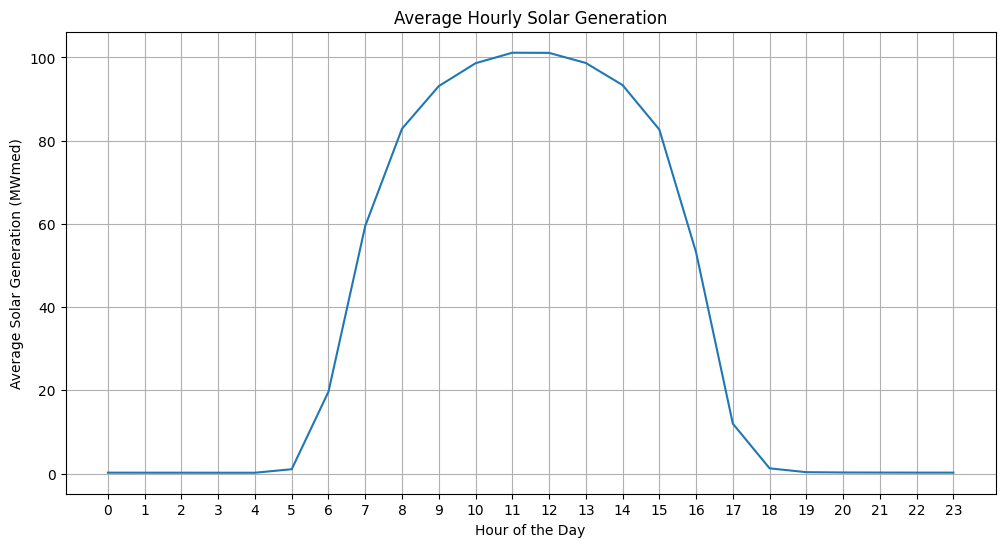

In [37]:
# Group by hour and calculate the average solar generation
hourly_trends = df_solar.groupby('Hour')['Solar Generated'].mean().reset_index()

# Plot the hourly solar generation trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trends, x='Hour', y='Solar Generated')
plt.title('Average Hourly Solar Generation')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Solar Generation (MWmed)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


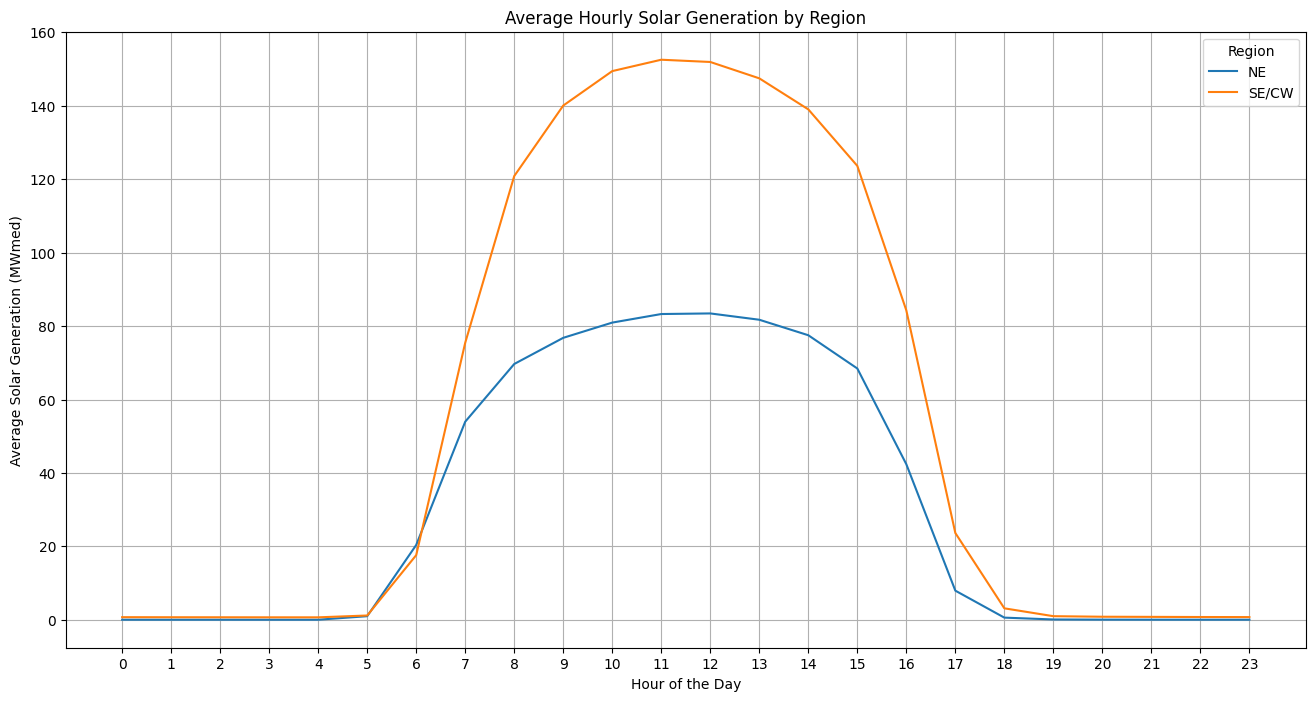

In [38]:
# Group by hour and region and calculate the average solar generation
hourly_trends_region = df_solar.groupby(['Hour', 'Region'])['Solar Generated'].mean().reset_index()

# Plot the hourly solar generation trend by region
plt.figure(figsize=(16, 8))
sns.lineplot(data=hourly_trends_region, x='Hour', y='Solar Generated', hue='Region')
plt.title('Average Hourly Solar Generation by Region')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Solar Generation (MWmed)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Region')
plt.show()


C:\Users\lilla\AppData\Local\Temp\ipykernel_6384\959552573.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_solar, x='Hour', y='Solar Generated', hue='Region', ci='sd')


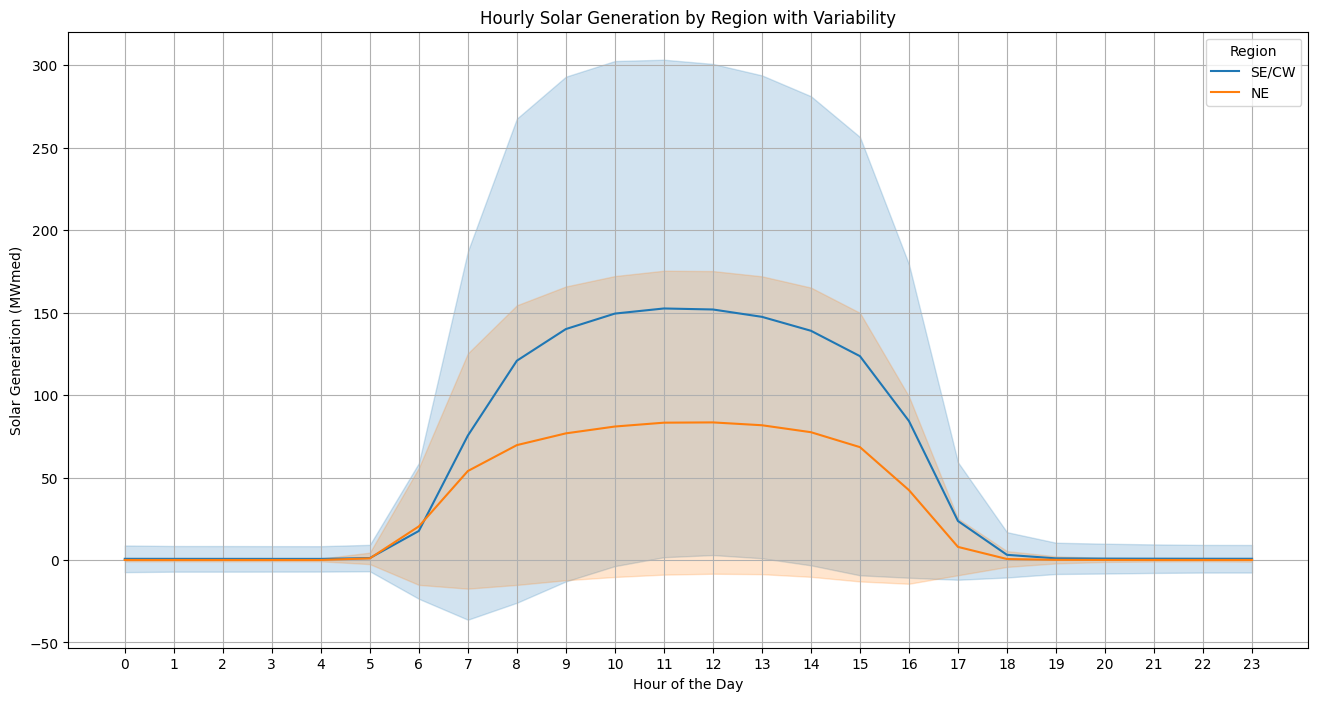

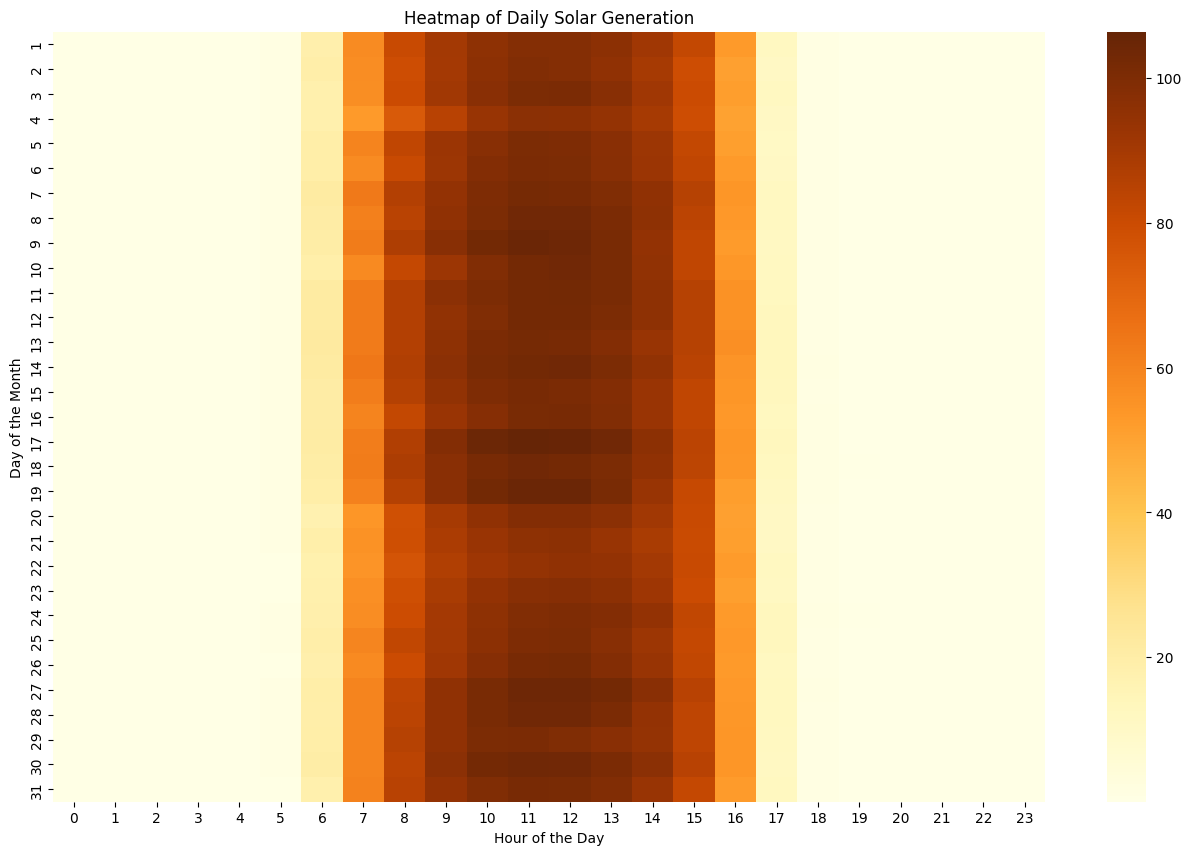

In [ ]:


# Plot average hourly solar generation with confidence intervals for each region
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_solar, x='Hour', y='Solar Generated', hue='Region', ci='sd')
plt.title('Hourly Solar Generation by Region with Variability')
plt.xlabel('Hour of the Day')
plt.ylabel('Solar Generation (MWmed)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Region')
plt.show()

# Optional: Plot monthly heatmaps to show daily variability
plt.figure(figsize=(16, 10))
df_solar['Day'] = df_solar['DateTime'].dt.day
pivot_table = df_solar.pivot_table(values='Solar Generated', index='Day', columns='Hour', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlOrBr')
plt.title('Heatmap of Daily Solar Generation')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Month')
plt.show()


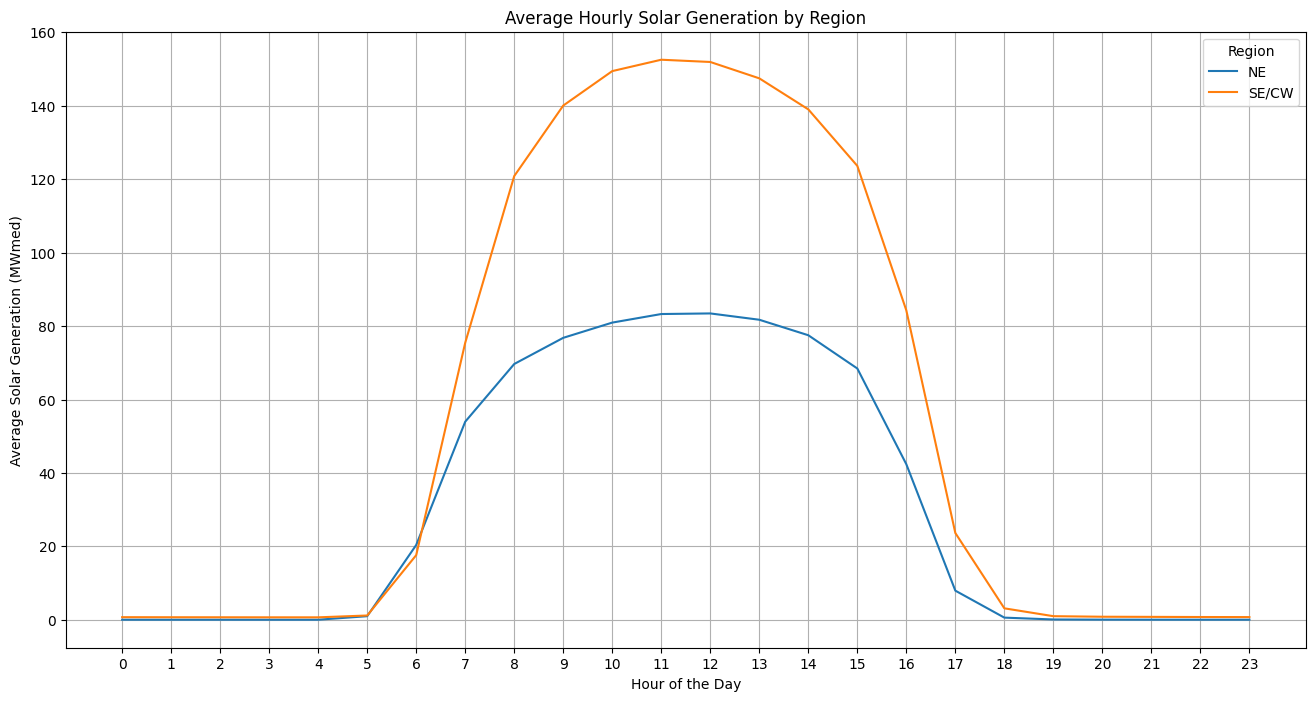

C:\Users\lilla\AppData\Local\Temp\ipykernel_6384\3883324137.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_solar.pivot_table(values='Solar Generated', index='Month', columns='Hour', aggfunc='mean')


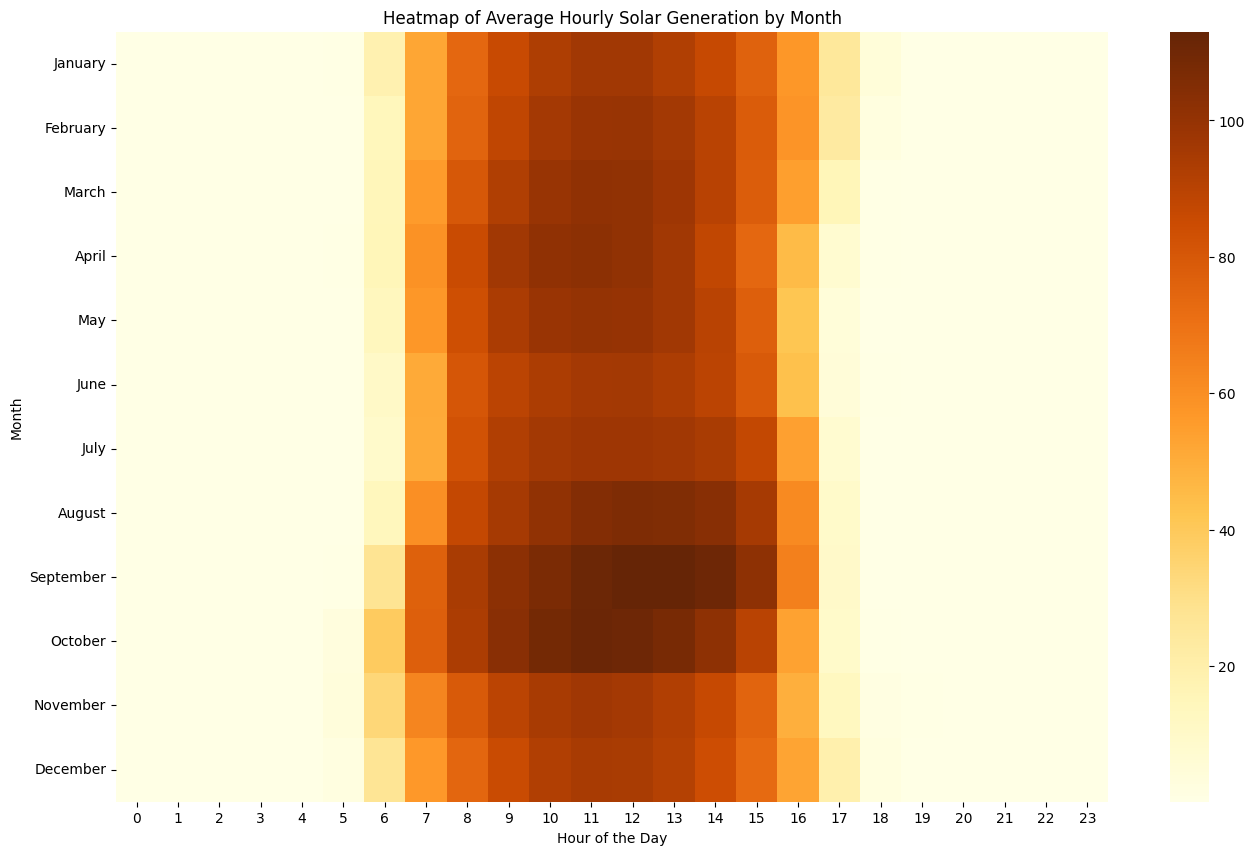

In [56]:

# Plot the hourly solar generation trend by region
plt.figure(figsize=(16, 8))
sns.lineplot(data=hourly_trends_region, x='Hour', y='Solar Generated', hue='Region')
plt.title('Average Hourly Solar Generation by Region')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Solar Generation (MWmed)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Region')
plt.show()

# Create a pivot table to display the average solar generation for each hour across months
pivot_table = df_solar.pivot_table(values='Solar Generated', index='Month', columns='Hour', aggfunc='mean')


# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlOrBr', annot=False)
plt.title('Heatmap of Average Hourly Solar Generation by Month')
plt.xlabel('Hour of the Day')
plt.ylabel('Month')
plt.show()


C:\Users\lilla\AppData\Local\Temp\ipykernel_6384\1589683507.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_year = df_solar.pivot_table(values='Solar Generated', index='Month', columns='Year', aggfunc='mean')


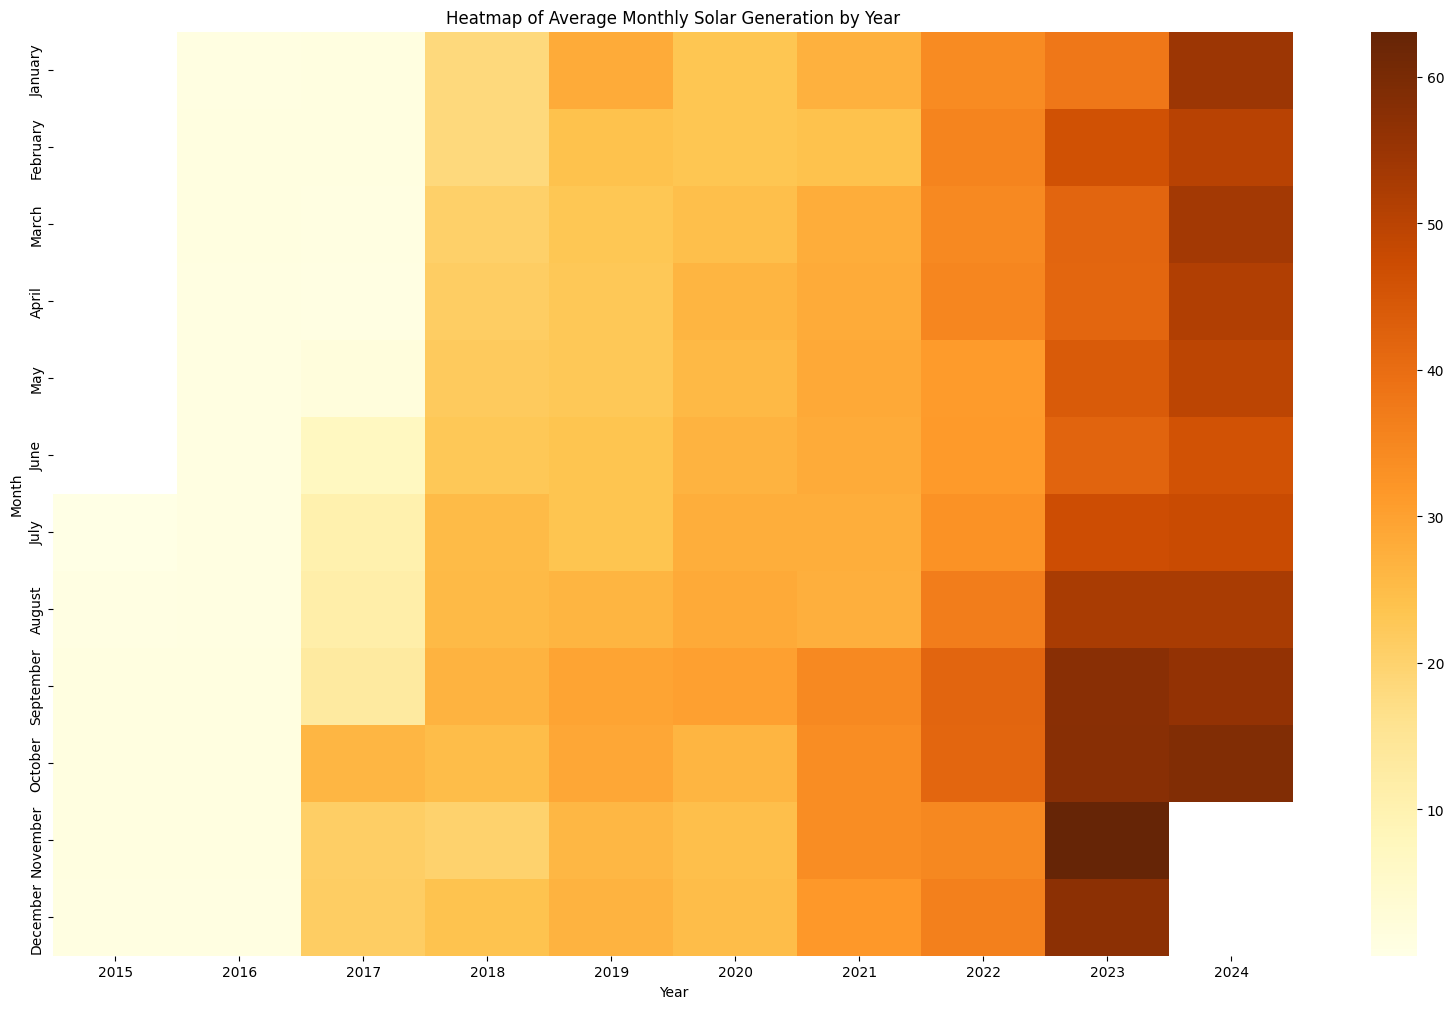

In [57]:
# Create a pivot table to show average solar generation by month and year
pivot_table_year = df_solar.pivot_table(values='Solar Generated', index='Month', columns='Year', aggfunc='mean')


# Plot the heatmap for average generation across years and months
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table_year, cmap='YlOrBr', annot=False)
plt.title('Heatmap of Average Monthly Solar Generation by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


In [51]:
# Filter data for 2023 and 2024 only
df_solar_23_24 = df_solar[df_solar['Year'].isin([2023])]

C:\Users\lilla\AppData\Local\Temp\ipykernel_6384\2450003295.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_solar.pivot_table(values='Solar Generated', index='Month', columns='Hour', aggfunc='mean')


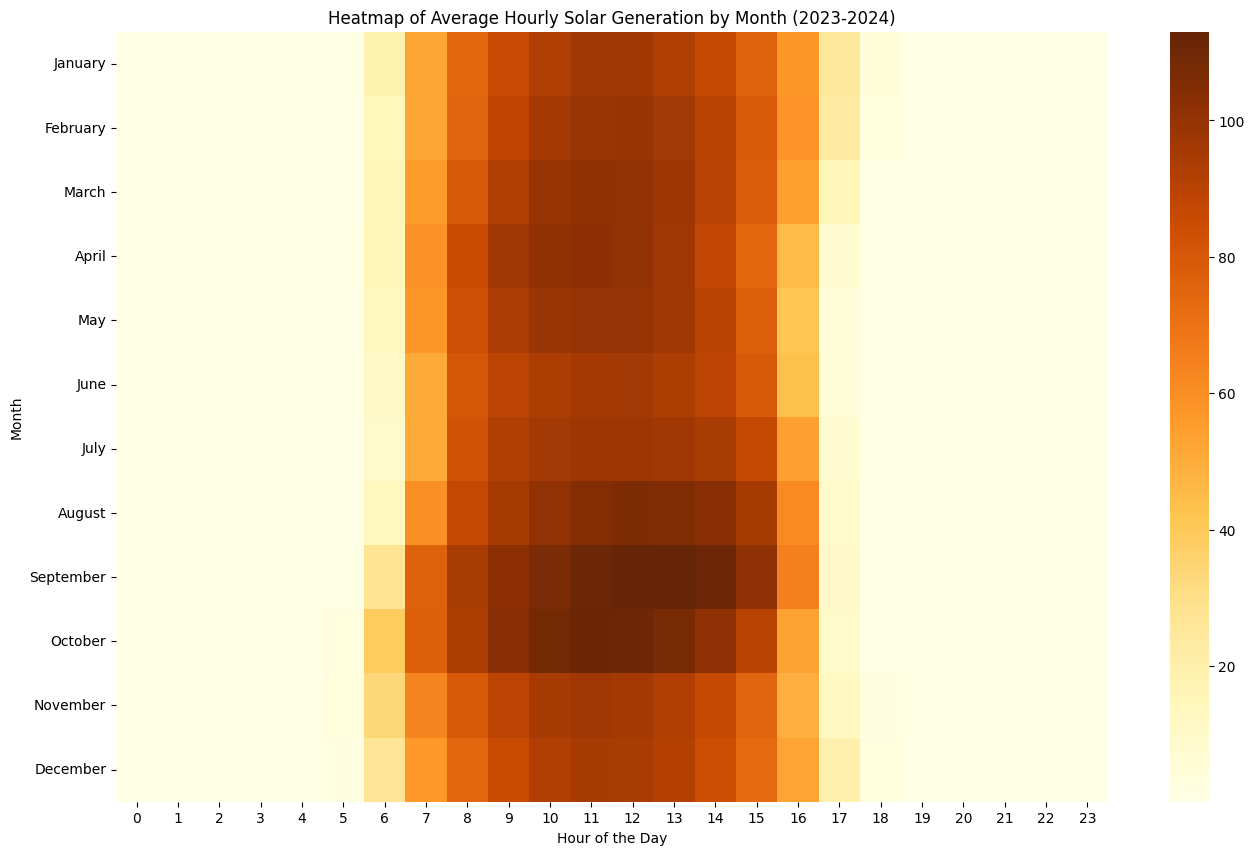

In [58]:
# Create a pivot table to display the average solar generation for each hour across months
pivot_table = df_solar.pivot_table(values='Solar Generated', index='Month', columns='Hour', aggfunc='mean')

# Plot the heatmap for average hourly generation by month
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='YlOrBr', annot=False)
plt.title('Heatmap of Average Hourly Solar Generation by Month (2023-2024)')
plt.xlabel('Hour of the Day')
plt.ylabel('Month')
plt.show()

C:\Users\lilla\AppData\Local\Temp\ipykernel_6384\617033130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_trends_month = df_solar.groupby(['Hour', 'Month'])['Solar Generated'].mean().reset_index()


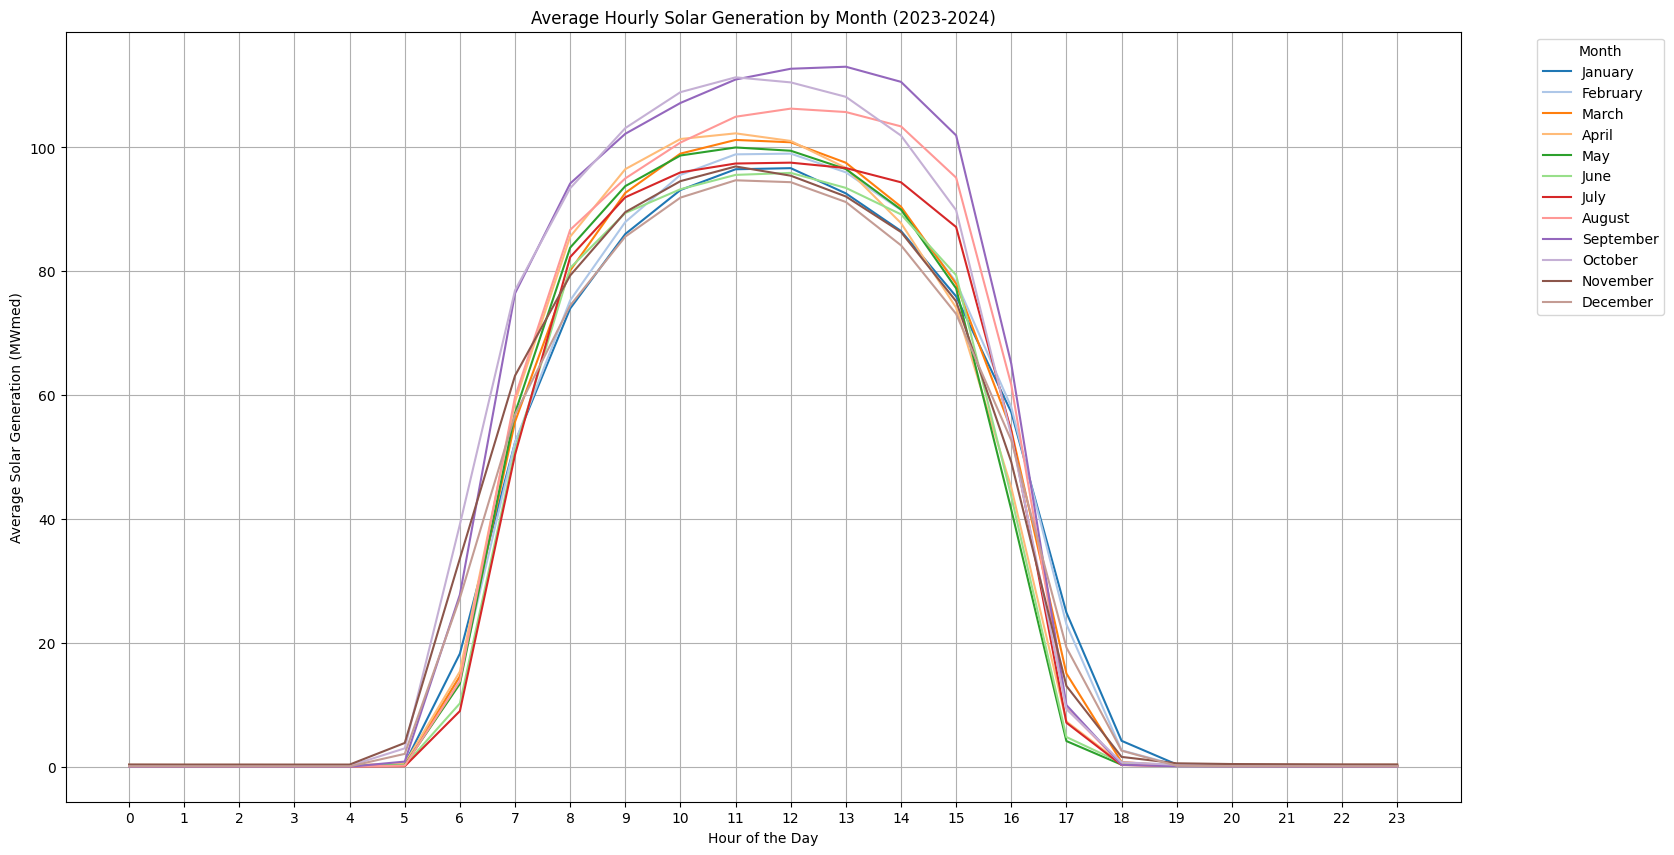

In [59]:
# Group by hour and month and calculate the average solar generation
hourly_trends_month = df_solar.groupby(['Hour', 'Month'])['Solar Generated'].mean().reset_index()

# Plot the hourly solar generation trend by month
plt.figure(figsize=(18, 10))
sns.lineplot(data=hourly_trends_month, x='Hour', y='Solar Generated', hue='Month', palette='tab20')
plt.title('Average Hourly Solar Generation by Month (2023-2024)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Solar Generation (MWmed)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
df_sol = df_solar[['DateTime','Solar Generated','Region']]

In [32]:
print(df_sol.isnull().sum())


DateTime             0
Solar Generated    624
Region               0
dtype: int64


In [33]:
df_sol['Hour'] = df_sol['DateTime'].dt.hour
hourly_avg = df_sol.groupby('Hour')['Solar Generated'].transform('mean')
df_sol['Solar Generated'].fillna(hourly_avg, inplace=True)

C:\Users\lilla\AppData\Local\Temp\ipykernel_6384\992550563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sol['Hour'] = df_sol['DateTime'].dt.hour
C:\Users\lilla\AppData\Local\Temp\ipykernel_6384\992550563.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sol['Solar Generate

In [34]:
print(df_sol.isnull().sum())


DateTime           0
Solar Generated    0
Region             0
Hour               0
dtype: int64


In [10]:
print(df_sol.info())
print("Date range:", df_sol['DateTime'].min(), "to", df_sol['DateTime'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913180 entries, 0 to 1913179
Data columns (total 3 columns):
 #   Column           Dtype         
---  ------           -----         
 0   DateTime         datetime64[ns]
 1   Solar Generated  float64       
 2   Region           object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 43.8+ MB
None
Date range: 2015-07-01 00:00:00 to 2024-10-21 23:00:00


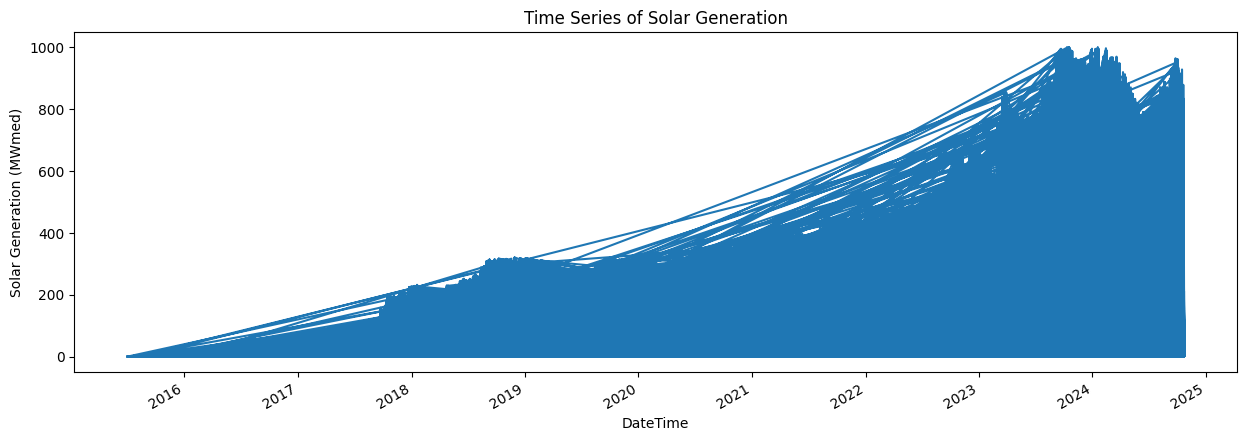

In [35]:
plt.figure(figsize=(15, 5))
df_sol.set_index('DateTime')['Solar Generated'].plot()
plt.title('Time Series of Solar Generation')
plt.xlabel('DateTime')
plt.ylabel('Solar Generation (MWmed)')
plt.show()


In [ ]:
# Filter rows where 'Solar Generated' is NaN
missing_data = df_sol[df_sol['Solar Generated'].isnull()]

# Display the missing rows
print(missing_data)

# Check the count of missing rows by 'Region'
print(missing_data['Region'].value_counts())

# Check the count of missing rows by date
missing_data['DateTime'].dt.date.value_counts().sort_index()


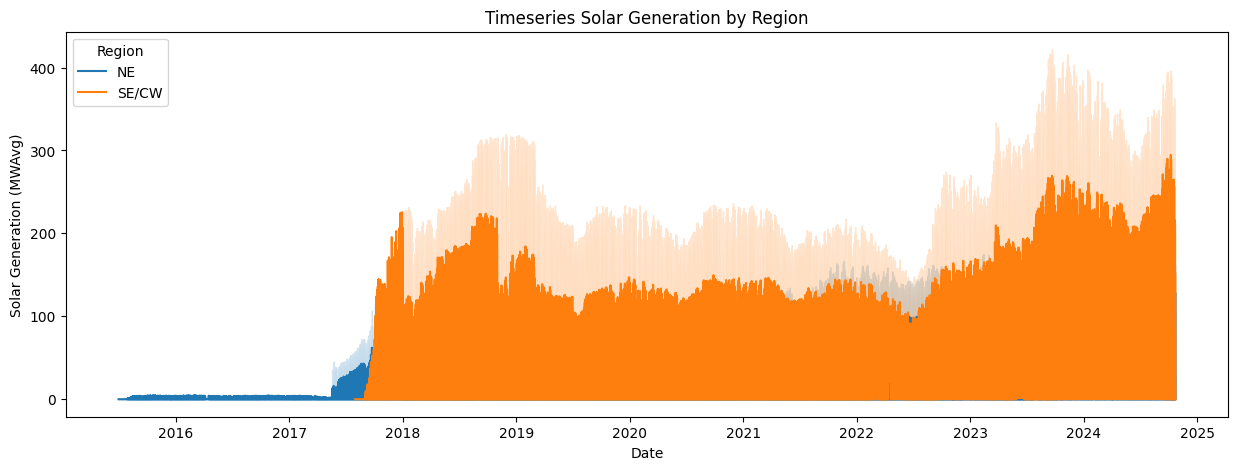

In [25]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_sol, x='DateTime', y='Solar Generated', hue='Region')
plt.title('Timeseries Solar Generation by Region')
plt.xlabel('Date')
plt.ylabel('Solar Generation (MWAvg)')
plt.legend(title='Region')
plt.show()


In [14]:
# Extract the date part to group by date
# Create a new column for the date
if 'Date' not in df_sol.columns:
    df_sol['Date'] = df_sol['DateTime'].dt.date

# Perform the aggregation
aggregated_df = df_sol.groupby(['Date', 'Region'])['Solar Generated'].agg(
    Total_Generation='sum',
    Average_Generation='mean',
    Std_Deviation='std',
    Peak_Generation='max'
).reset_index()

# Display the aggregated DataFrame
print(aggregated_df.head())


         Date Region  Total_Generation  Average_Generation  Std_Deviation  \
0  2015-07-01     NE               0.0                 0.0            0.0   
1  2015-07-02     NE               0.0                 0.0            0.0   
2  2015-07-03     NE               0.0                 0.0            0.0   
3  2015-07-04     NE               0.0                 0.0            0.0   
4  2015-07-05     NE               0.0                 0.0            0.0   

   Peak_Generation  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  


C:\Users\lilla\AppData\Local\Temp\ipykernel_38112\668837175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sol['Date'] = df_sol['DateTime'].dt.date


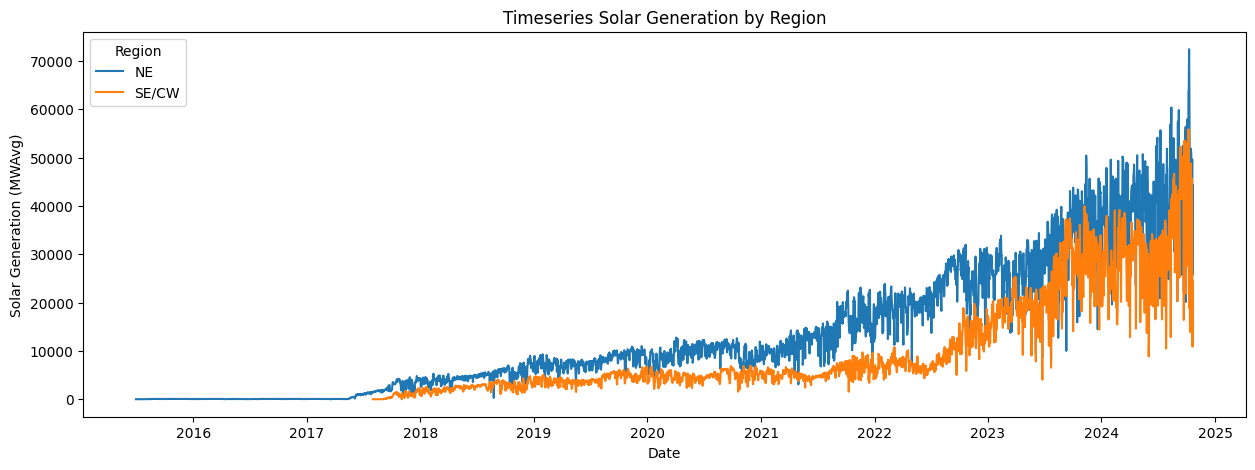

In [22]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=aggregated_df, x='Date', y='Total_Generation', hue='Region')
plt.title('Timeseries Solar Generation by Region')
plt.xlabel('Date')
plt.ylabel('Solar Generation (MWAvg)')
plt.legend(title='Region')
plt.show()


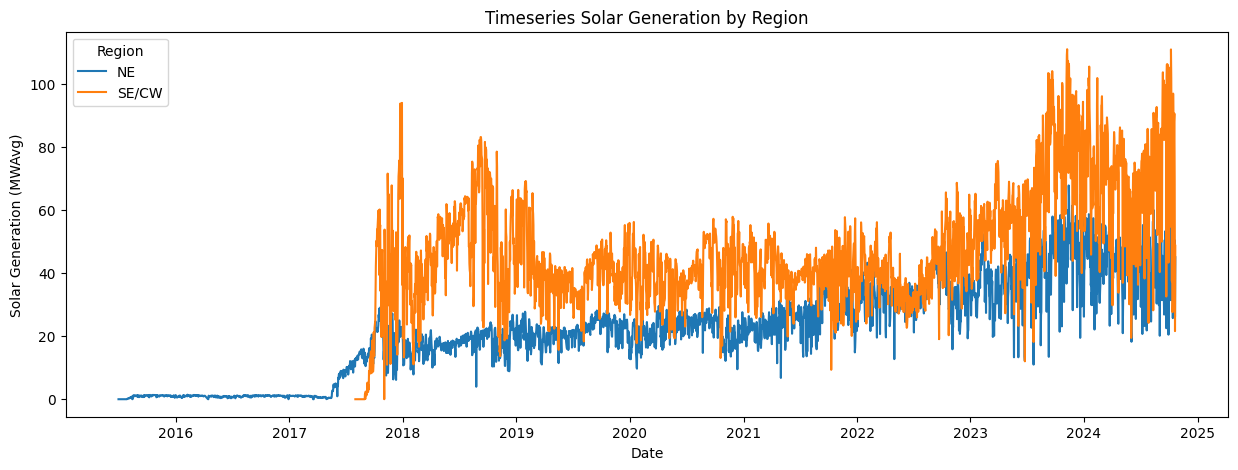

In [24]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=aggregated_df, x='Date', y='Average_Generation', hue='Region')
plt.title('Timeseries Solar Generation by Region')
plt.xlabel('Date')
plt.ylabel('Solar Generation (MWAvg)')
plt.legend(title='Region')
plt.show()


C:\Users\lilla\AppData\Local\Temp\ipykernel_38112\441494948.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=aggregated_df, x='Date', y='Total_Generation', hue='Region', ci=None)


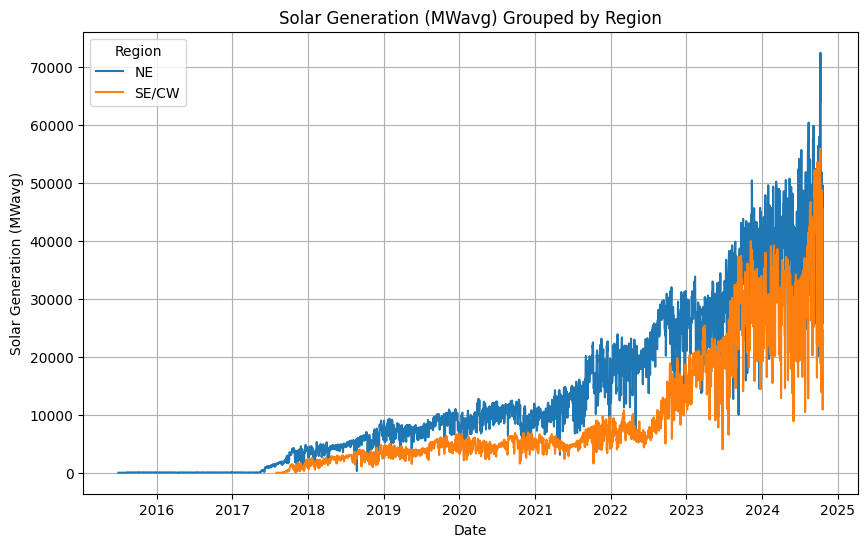

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

    
    # Create a plot for this year showing different regions on the same graph
plt.figure(figsize=(10, 6))
    
    # Use seaborn's lineplot with 'hue' to differentiate regions
sns.lineplot(data=aggregated_df, x='Date', y='Total_Generation', hue='Region', ci=None)
    
    # Customize the plot
plt.title(f'Solar Generation (MWavg) Grouped by Region')
plt.xlabel('Date')
plt.ylabel('Solar Generation (MWavg)')
plt.grid(True)
    
    # Show the plot
plt.legend(title='Region')
plt.show()